<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Import required libraries
</p>

In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import scipy.stats as st
from scipy.stats import pearsonr
import seaborn as sns
from math import sqrt
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,BayesianRidge,Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Set definitions
</p>

In [2]:
# Inline plots.
%matplotlib inline

# Display formats.
pd.set_option('display.max_columns', None) # Pandas max columns to display.
pd.set_option('display.max_rows', None) # Pandas max rows to display.
pd.set_option('display.float_format', lambda x: '%.4f' % x) # Pandas numeric format.
pd.set_option('display.max_colwidth', 150) # Pandas max column width.

# Set Jupiter notebook to present multiple outputs for each cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Load and examine dataset
</p>

In [3]:
# Dataset was retrieved from Kaggle.com, belonging to the "House Prices: Advanced Regression Techniques" competition.
# Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

# Read dataset.
print ('Reading dataset...')
data = pd.read_csv(r'C:\Users\AA\AnacondaProjects\Python for Data Science Codes\Final Project\House Prices data\train.csv',
                   sep=',')


# Present data set shape.
print('Number of variables:', data.shape[1])
print('Number of cases:', data.shape[0])

Reading dataset...
Number of variables: 81
Number of cases: 1460


In [4]:
# Display variable names and types.
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [5]:
# Count variable types.
data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [6]:
# Display 20 top entries and examine dataset.
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0000,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0000,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0000,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0000,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable

In [7]:
# Check for duplicate ID values.
ids_dup = sum(data.duplicated('Id'))
print('Number of duplicate IDs: %i out of %i total cases' %(ids_dup,data.shape[1]))

# If found, remove duplicate cases.
if ids_dup > 0:
    data.drop_duplicates(['Id'])
    print('Cases with duplicate Ids have been removed')
    
# No duplicate IDs were found, so there are no duplicate cases to remove.

Number of duplicate IDs: 0 out of 81 total cases


In [8]:
# Remove Id column (redundant for analysis).
data.drop('Id', axis = 1, inplace = True)
del ids_dup

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Data exploration
</p>

In [9]:
# Describe the variable we want to predcit (i.e., the dependant varialbe) - sales price.
data['SalePrice'].describe()

# 180,921.2 USD is the mean sale price, with a standard deviation of 79,442.5.

count     1460.0000
mean    180921.1959
std      79442.5029
min      34900.0000
25%     129975.0000
50%     163000.0000
75%     214000.0000
max     755000.0000
Name: SalePrice, dtype: float64

In [10]:
# Describe all other (quantitive) variables.
data[data.columns[data.columns != 'SalePrice']].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.0000,1201.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1452.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1379.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000
mean,56.8973,70.0500,10516.8281,6.0993,5.5753,1971.2678,1984.8658,103.6853,443.6397,46.5493,567.2404,1057.4295,1162.6267,346.9925,5.8445,1515.4637,0.4253,0.0575,1.5651,0.3829,2.8664,1.0466,6.5178,0.6130,1978.5062,1.7671,472.9801,94.2445,46.6603,21.9541,3.4096,15.0610,2.7589,43.4890,6.3219,2007.8158
std,42.3006,24.2848,9981.2649,1.3830,1.1128,30.2029,20.6454,181.0662,456.0981,161.3193,441.8670,438.7053,386.5877,436.5284,48.6231,525.4804,0.5189,0.2388,0.5509,0.5029,0.8158,0.2203,1.6254,0.6447,24.6897,0.7473,213.8048,125.3388,66.2560,61.1191,29.3173,55.7574,40.1773,496.1230,2.7036,1.3281
min,20.0000,21.0000,1300.0000,1.0000,1.0000,1872.0000,1950.0000,0.0000,0.0000,0.0000,0.0000,0.0000,334.0000,0.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1900.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2006.0000
25%,20.0000,59.0000,7553.5000,5.0000,5.0000,1954.0000,1967.0000,0.0000,0.0000,0.0000,223.0000,795.7500,882.0000,0.0000,0.0000,1129.5000,0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,5.0000,0.0000,1961.0000,1.0000,334.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,2007.0000
50%,50.0000,69.0000,9478.5000,6.0000,5.0000,1973.0000,1994.0000,0.0000,383.5000,0.0000,477.5000,991.5000,1087.0000,0.0000,0.0000,1464.0000,0.0000,0.0000,2.0000,0.0000,3.0000,1.0000,6.0000,1.0000,1980.0000,2.0000,480.0000,0.0000,25.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,2008.0000
75%,70.0000,80.0000,11601.5000,7.0000,6.0000,2000.0000,2004.0000,166.0000,712.2500,0.0000,808.0000,1298.2500,1391.2500,728.0000,0.0000,1776.7500,1.0000,0.0000,2.0000,1.0000,3.0000,1.0000,7.0000,1.0000,2002.0000,2.0000,576.0000,168.0000,68.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,2009.0000
max,190.0000,313.0000,215245.0000,10.0000,9.0000,2010.0000,2010.0000,1600.0000,5644.0000,1474.0000,2336.0000,6110.0000,4692.0000,2065.0000,572.0000,5642.0000,3.0000,2.0000,3.0000,2.0000,8.0000,3.0000,14.0000,3.0000,2010.0000,4.0000,1418.0000,857.0000,547.0000,552.0000,508.0000,480.0000,738.0000,15500.0000,12.0000,2010.0000


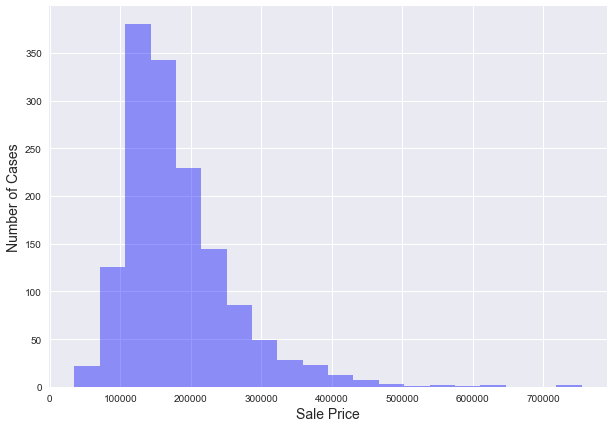

In [11]:
# Diplay a histogram of SalesPrice.
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

axis = sns.distplot(data['SalePrice'],hist=True,kde=False,bins=20,color='b');

axis.set_xlabel('Sale Price',fontsize=14);
axis.set_ylabel('Number of Cases',fontsize=14);

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Feature engineering
</p>

In [12]:
# for the following variables, NaN values mean None 
# (for example, NaN for Alley means there is no alley access):
# Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, 
# BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual,
# GarageCond, PoolQC, Fence, MiscFeature

# Change these NaN values to "None" string.
# Note: Numeric variables related to these variables equal 0 for NaNs 
# (e.g., , such as GarageArea = 0 when there is no garage).

NaN_to_None_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', \
'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', \
'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col_name in NaN_to_None_cols:
    temp = pd.Series(data[col_name].values, index=data.index)
    
    null_ind = data[col_name].isnull()
    temp[null_ind] = 'None'
    data[col_name] = temp
    
    del temp

In [13]:
# Encode categorical variables as ordered numbers when relevant, i.e., when n categories represent ascending values and n>5, 
# use 0 for the lowest category and n for the highest category.
# This is done instead of encoding dummy variables for these variables.

data = data.replace({  
                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}
                     })

In [14]:
# Month values are arbitrary, for example in the senes that december (12) is not larger than novemeber (1).
# Also, its more informative to look at seasons than months, since they differ more significantly one from the other.
# Hence, change Month sold (MoSold) to season sold, i.e., from month number (integer) to season (categorial).

# Create temporary series to be switched with MoSold column in data 
# (so that no changes are implied directly to a slice of a copy of data)
mon = pd.Series('NaN', index=data.index)

# Winter
ind = (data['MoSold'] == 12) | ((data['MoSold'] >= 1) & (data['MoSold'] < 3));
mon[ind] = 'Winter'

# Spring
ind = (data['MoSold'] >= 3) & (data['MoSold'] < 6);
mon[ind] = 'Spring'

# Summer
ind = (data['MoSold'] >= 6) & (data['MoSold'] < 9);
mon[ind] = 'Summer'

# Fall
ind = (data['MoSold'] >= 9) & (data['MoSold'] < 12);
mon[ind] = 'Fall'


idx = data.columns.get_loc("MoSold") # Use same index as old column.
data.insert(loc=idx, column='SesSold', value=mon) # Add the new "SesSold" column to dataframe.

del data['MoSold'] # Delete the old column form dataframe.
del mon # Delete temporary variable.

In [15]:
# Number of dwelling type (MSSubClass) variables are arbitrary and represent categorical values.
# Thus, change MSSubClass values from number (integer) to letter (categorial).

# Create temporary series to be switched with MoSold column in data 
# (so that no changes are implied directly to a slice of a copy of data)
cl = pd.Series('NaN',index=data.index)

num_classes = data['MSSubClass'].unique()
num_classes.sort()
abc_classes = list(map(chr, range(97, 97+len(num_classes))))

print('For MSSubClass variable:')
for num,let in zip(num_classes,abc_classes):
    cl_ind = data['MSSubClass'] == num
    cl[cl_ind] = let
    print('class %i changed to %s' %(num,let))
    
data['MSSubClass'] = cl
del cl

For MSSubClass variable:
class 20 changed to a
class 30 changed to b
class 40 changed to c
class 45 changed to d
class 50 changed to e
class 60 changed to f
class 70 changed to g
class 75 changed to h
class 80 changed to i
class 85 changed to j
class 90 changed to k
class 120 changed to l
class 160 changed to m
class 180 changed to n
class 190 changed to o


<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Process missing data
</p>

In [16]:
# Check for missing values.

# Get percentage of missing values for each variable (column)
null_cols = data.apply(lambda x: sum(x.isnull())/data.shape[0]*100,axis=0)

# How many variables have missing values?
print('%i out of %i variables have missing values (%.2f precent)' 
      %(null_cols[null_cols > 0].shape[0],data.shape[1],null_cols[null_cols > 0].shape[0] / data.shape[1]*100))

# Present variables with missing values
print()
print("Percent of missing values in each variable:")
print(null_cols[null_cols > 0])

5 out of 80 variables have missing values (6.25 precent)

Percent of missing values in each variable:
LotFrontage   17.7397
MasVnrType     0.5479
MasVnrArea     0.5479
Electrical     0.0685
GarageYrBlt    5.5479
dtype: float64


In [17]:
# Clean data: remove variables (columns) with more than a maximal (20%) NaN values percentage.

# Set max percent of missing values.
na_maxPer = 20

# Present variables with more than 20% missing values.
null_cols[null_cols > na_maxPer]

# Remove variables with more than 20% missing values. 
rem_cols = null_cols[null_cols > na_maxPer].index
data.drop(rem_cols,axis=1,inplace=True)

print(len(rem_cols), 'variables had more than', na_maxPer, '% missing values and hence were omitted')
print('Out of', len(data.columns), 'variables, ', len(data.columns),'remained')

Series([], dtype: float64)

0 variables had more than 20 % missing values and hence were omitted
Out of 80 variables,  80 remained


In [18]:
# Replace missing values by median (for quantitative variables) or by mode (for qualitative variables).

# Present remaining variables with missing values.
clean_null_cols = data.apply(lambda x: sum(x.isnull())/data.shape[0]*100,axis=0);
# clean_null_cols[clean_null_cols > 0]
fillNa_cols = clean_null_cols[clean_null_cols > 0].index


for col_name in fillNa_cols:
    # Check for type of data to be filled
    print(type(data[col_name]))
    #print(data[col_name].dtypes)
    if data[col_name].dtypes != 'object':
        data[col_name].fillna(data[col_name].median(), inplace=True)
    else:
        common = data[col_name][data[col_name].isnull()==False].value_counts().idxmax()
        temp = pd.Series(data[col_name].values, index=data.index)
        null_ind = data[col_name].isnull()
        temp[null_ind] = common
        data[col_name] = temp
    
print('NaN values were filled as mean/mode value for variables:',data[fillNa_cols].columns.values)

print('Are there no NaNs left in dataframe?',not data.isnull().any().any())

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
NaN values were filled as mean/mode value for variables: ['LotFrontage' 'MasVnrType' 'MasVnrArea' 'Electrical' 'GarageYrBlt']
Are there no NaNs left in dataframe? True


<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Data preprocessing
</p>

In [19]:
# Keep a copy of raw data before transformations for plotting.
data_raw = data.copy()

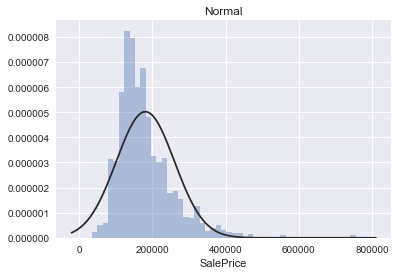

Sale Price Skewness: 1.881


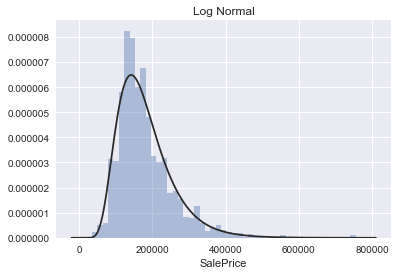

Sale Price Skewness after transformation: 0.121


In [20]:
# Examine if the prediced variable (SalePrice) follows normal distribution and if not, use apporpraite transoformation
# to make it more normal-like.
# Note: a distribution with skewness between -1 to 1 is considered normal here.

plt.figure()
fig.set_size_inches(10,7)
plt.title('Normal')
sns.distplot(data['SalePrice'], kde=False, fit=st.norm)
plt.show()

print('Sale Price Skewness: %.3f' %(st.skew(data['SalePrice'])))

# It does not. Will it do following log tansform?
plt.figure()
fig.set_size_inches(10,7)
plt.title('Log Normal')
sns.distplot(data['SalePrice'], kde=False, fit=st.lognorm)
plt.show()

# Yes. Hence, apply log transofm.
data['SalePrice'] = np.log1p(data['SalePrice'])

print('Sale Price Skewness after transformation: %.3f' %(st.skew(data['SalePrice'])))

In [21]:
# Get quantitative and qualitative column names seperately.
quantitative = [f for f in data.columns if data.dtypes[f] != 'object']
qualitative = [f for f in data.columns if data.dtypes[f] == 'object']

quantitative.remove('SalePrice') # Remove the prediced varibale.

In [22]:
# Log transform skewed variables - in order to reduce skewness and achieve a more normal distribution. 

max_skew = 1 # Set maximal skewness.

# Log tranform variables with skewness larger than maximal.
# Use the log1p function, which returns natural logarithm of one plus the input array, and keeps 0 values as 0.
skewness = data[quantitative].apply(lambda x: st.skew(x))
skewed = skewness[abs(skewness) > max_skew]
skewed_vars = skewed.index
data[skewed_vars] = np.log1p(data[skewed_vars])

print("%i skewed numerical features were log transformed:" %(skewed.shape[0]))
print(skewed_vars)

30 skewed numerical features were log transformed:
Index(['LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'MasVnrArea', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'MiscVal'],
      dtype='object')


<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Correlation analysis
</p>

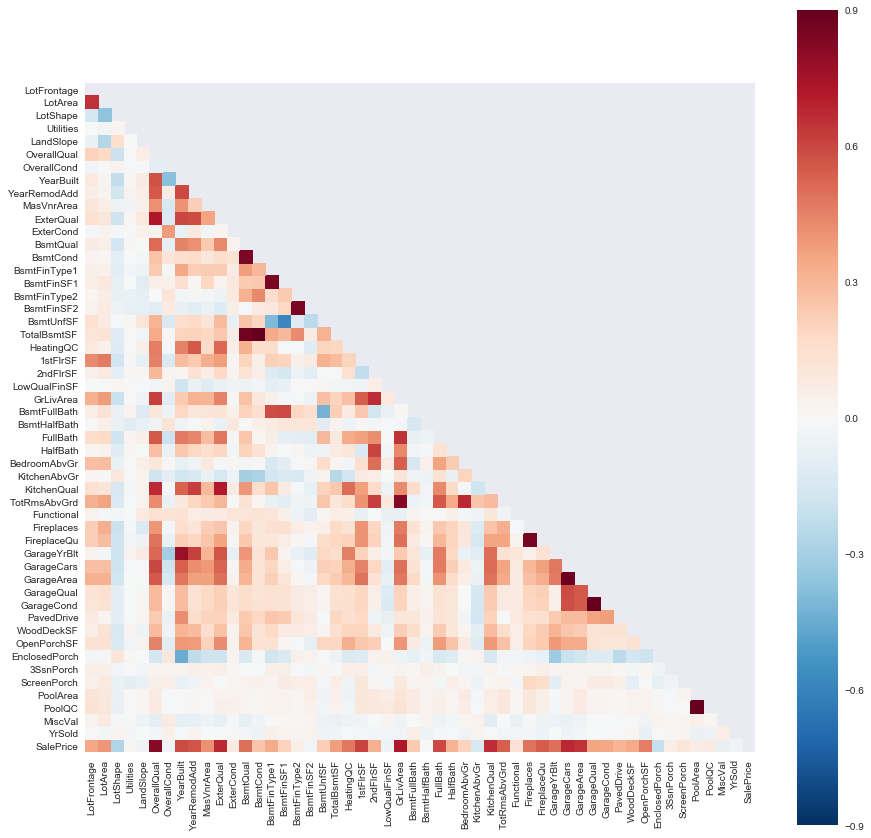

In [23]:
# Diplay a correlation matrix of all variables.

# Get correlations.
cor_mat = data.corr()

# Creaste a mask for hiding upper triangle (so that each correlation appears once and not twice).
mask = np.zeros_like(cor_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Display correlation matrix.
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cor_mat, vmax=.9, square=True, mask=mask);

In [24]:
# Diplay sorted correlation coefficients of variables with SalesPrice.
cor_mat_abs = data.corr().abs()
cor_mat_abs = cor_mat_abs['SalePrice'].sort_values(ascending=False)

cor_mat_abs.drop('SalePrice',inplace=True) # Drop the coefficient of Saleprice with itself.

print(cor_mat_abs) 
#cor_mat[:5].keys()

OverallQual     0.8172
GrLivArea       0.7303
GarageCars      0.6806
ExterQual       0.6788
KitchenQual     0.6679
GarageArea      0.6509
1stFlrSF        0.6090
FullBath        0.5948
YearBuilt       0.5866
YearRemodAdd    0.5656
FireplaceQu     0.5464
TotRmsAbvGrd    0.5344
BsmtQual        0.4986
GarageYrBlt     0.4958
Fireplaces      0.4894
HeatingQC       0.4738
OpenPorchSF     0.4599
MasVnrArea      0.4133
LotArea         0.3999
TotalBsmtSF     0.3728
GarageQual      0.3539
GarageCond      0.3511
LotFrontage     0.3462
WoodDeckSF      0.3430
BsmtFinType1    0.3348
2ndFlrSF        0.3193
HalfBath        0.3140
PavedDrive      0.3024
LotShape        0.2732
BsmtCond        0.2565
BsmtFullBath    0.2362
BsmtUnfSF       0.2220
BedroomAbvGr    0.2090
BsmtFinSF1      0.2081
EnclosedPorch   0.2073
KitchenAbvGr    0.1443
Functional      0.1351
ScreenPorch     0.1059
PoolQC          0.0756
ExterCond       0.0712
PoolArea        0.0699
MiscVal         0.0671
3SsnPorch       0.0588
LowQualFinS

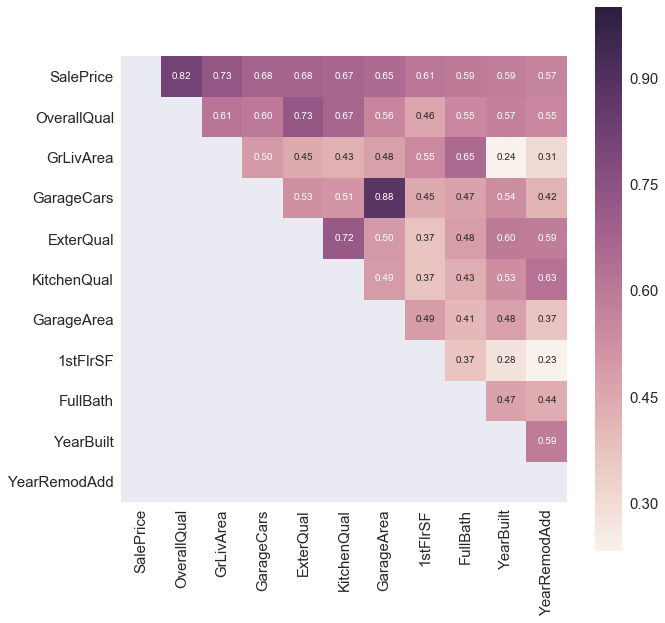

In [25]:
# Diplay a zoomed correlation matrix for variables with largest correlations with sales price.
n = 11 #number of variables for heatmap
cols = cor_mat.nlargest(n, 'SalePrice')['SalePrice'].index
max_corr_mat = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)

# Create mask.
mask = np.zeros_like(max_corr_mat, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Present map.
f, ax = plt.subplots(figsize=(10,10))
hmap = sns.heatmap(max_corr_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},yticklabels=cols.values, xticklabels=cols.values, mask=mask)
plt.show()


In [26]:
cor_mat_abs[1:11].keys() # Get names of 10 varialbes with largest correlations with SalesPrice. 

Index(['GrLivArea', 'GarageCars', 'ExterQual', 'KitchenQual', 'GarageArea',
       '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'FireplaceQu'],
      dtype='object')

In [27]:
# Examine correlation of qulatitive variables with SalePrice:
# For each variable, recode to dummy vaiables and use mutiple linear regression (OLS) to predict SalePrice.
# R values of these mutiple regressions represent the correlation between the qulatitive variable and SalePrice.

qual_corrs = pd.Series()

y = data['SalePrice']

for var in qualitative:
    X = pd.get_dummies(data[var])
    model = OLS(y, X)
    result = model.fit()
    r = sqrt(result.rsquared)
    
    qual_corrs[var] = r


In [28]:
# Display sorted r values.
qual_corrs.sort_values(ascending=False)

Neighborhood    0.7555
GarageFinish    0.6173
GarageType      0.5785
MSSubClass      0.5746
Foundation      0.5510
MasVnrType      0.4338
Exterior1st     0.4261
MSZoning        0.4193
Exterior2nd     0.4141
BsmtExposure    0.3776
SaleCondition   0.3592
CentralAir      0.3516
SaleType        0.3466
HouseStyle      0.3195
Electrical      0.3107
RoofStyle       0.2076
Condition1      0.2060
Fence           0.2059
BldgType        0.2004
Heating         0.1815
Alley           0.1662
LandContour     0.1601
LotConfig       0.1528
RoofMatl        0.1338
Condition2      0.1097
MiscFeature     0.0993
SesSold         0.0603
Street          0.0574
dtype: float64

In [29]:
all_corrs = pd.concat([cor_mat_abs,qual_corrs])
all_corrs_sorted = all_corrs.sort_values(ascending=False)

# all_corrs_sorted[:10]
all_corrs_sorted[:10].keys()
all_corrs_sorted[:10].values

Index(['OverallQual', 'Neighborhood', 'GrLivArea', 'GarageCars', 'ExterQual',
       'KitchenQual', 'GarageArea', 'GarageFinish', '1stFlrSF', 'FullBath'],
      dtype='object')

array([ 0.81718461,  0.75551842,  0.73025377,  0.68062487,  0.67884025,
        0.66789333,  0.65088768,  0.61727922,  0.60895504,  0.59477066])

<Container object of 10 artists>

(0, 1)

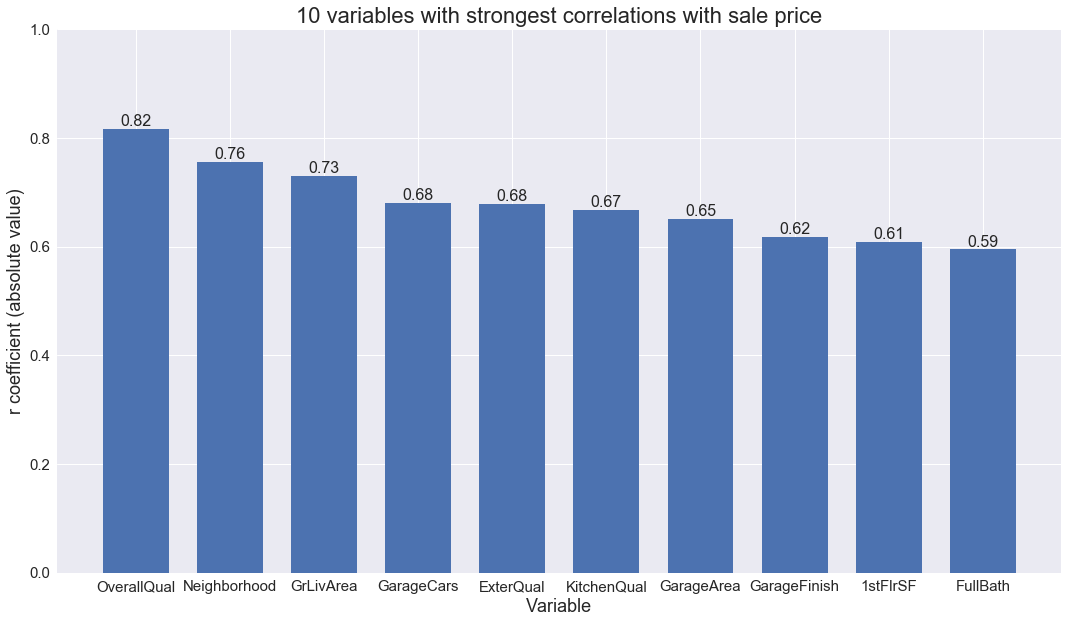

In [30]:
# Plot regression coefficients of most correlated variables.

n = 10
x = all_corrs_sorted[:n].keys()
y = all_corrs_sorted[:n].values

fig, axis = plt.subplots(figsize=(18, 10));

axis.grid(True)
title = '%i variables with strongest correlations with sale price' %(n)
axis.set_title(title, fontsize=22)
axis.set_ylabel('r coefficient (absolute value)',fontsize=18)
axis.set_xlabel('Variable',fontsize=18)

axis.bar(range(len(y)), y, width=0.7, align='center')

axis.set_xticks(np.arange(len(x)))
axis.set_xticklabels(x)
axis.set_ylim(0,1)

rects = axis.patches
labels = ["%.2f" % var for var in y]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    axis.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom',fontsize=16)

plt.show()

fig.savefig('Top corrs', bbox_inches='tight', transparent=False); # Save figure.

(0, 800000)

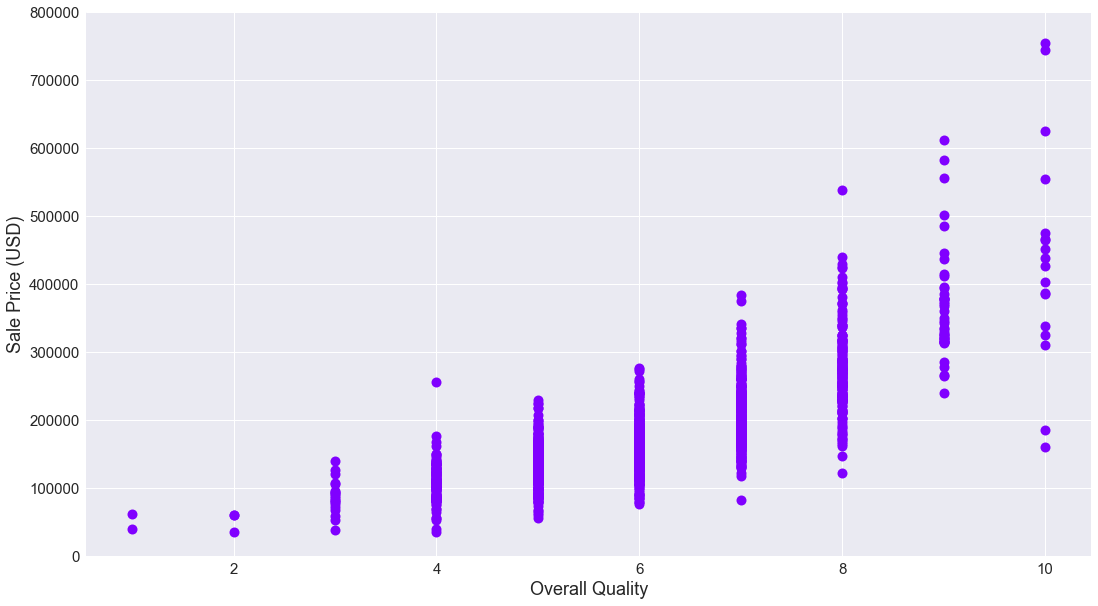

<Container object of 25 artists>

(0, 800000)

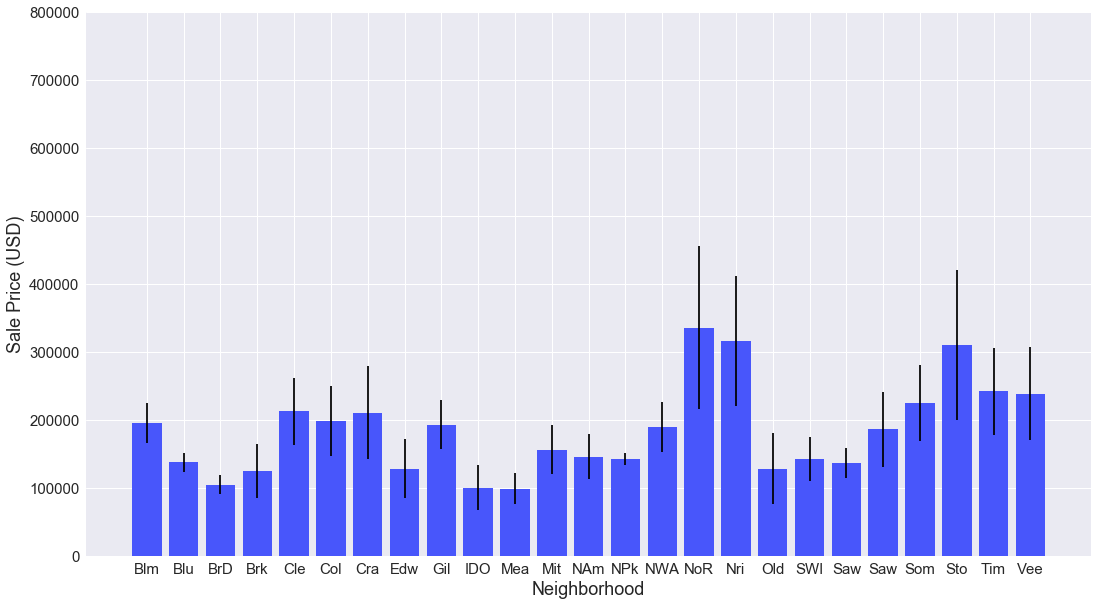

(0, 800000)

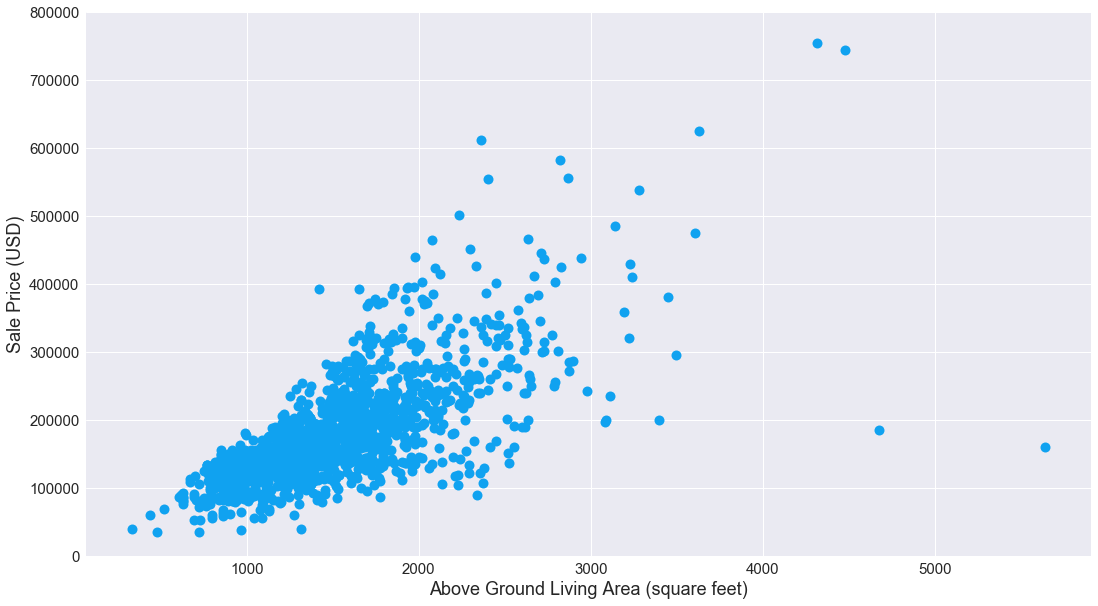

(0, 800000)

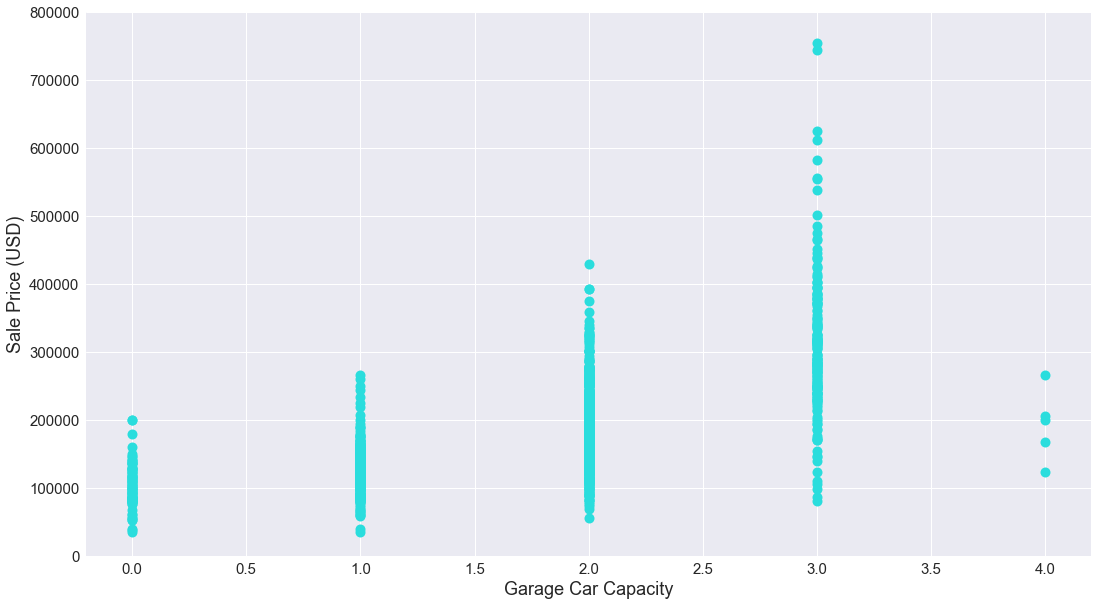

(0, 800000)

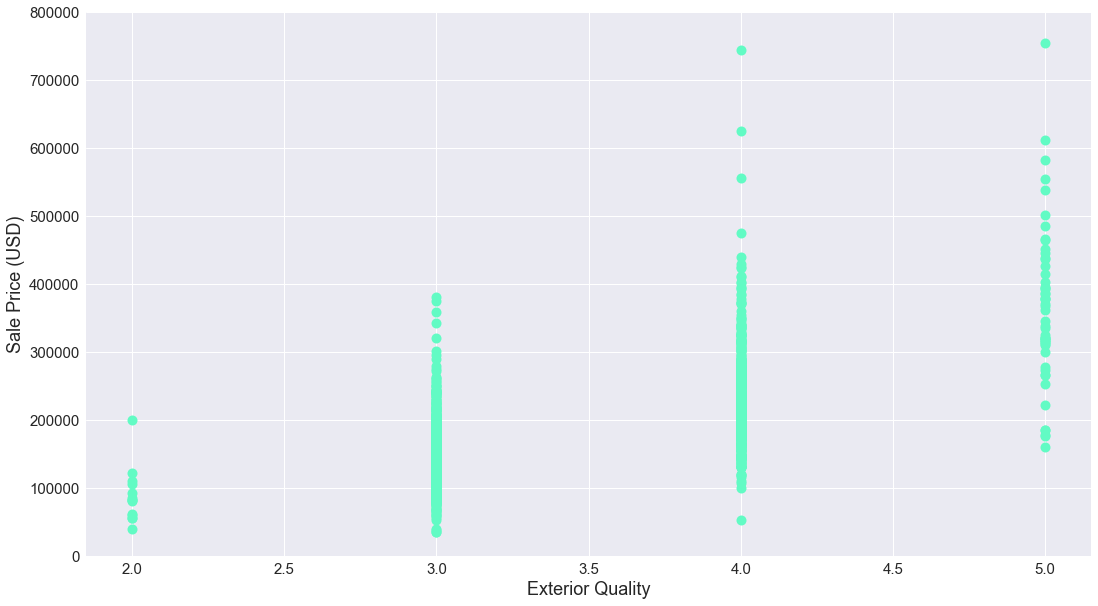

(0, 800000)

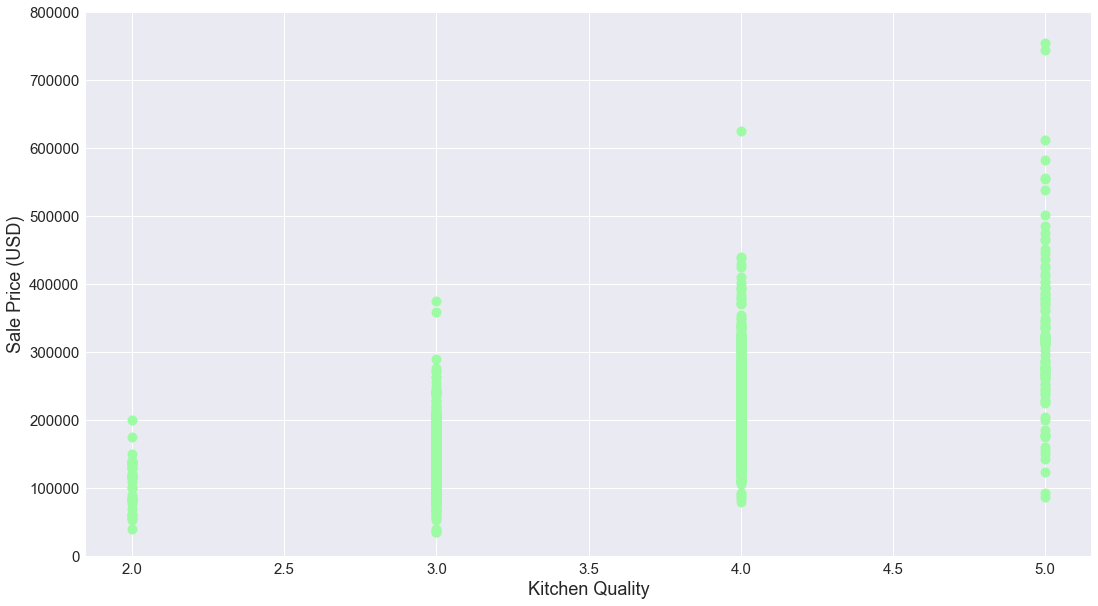

(0, 800000)

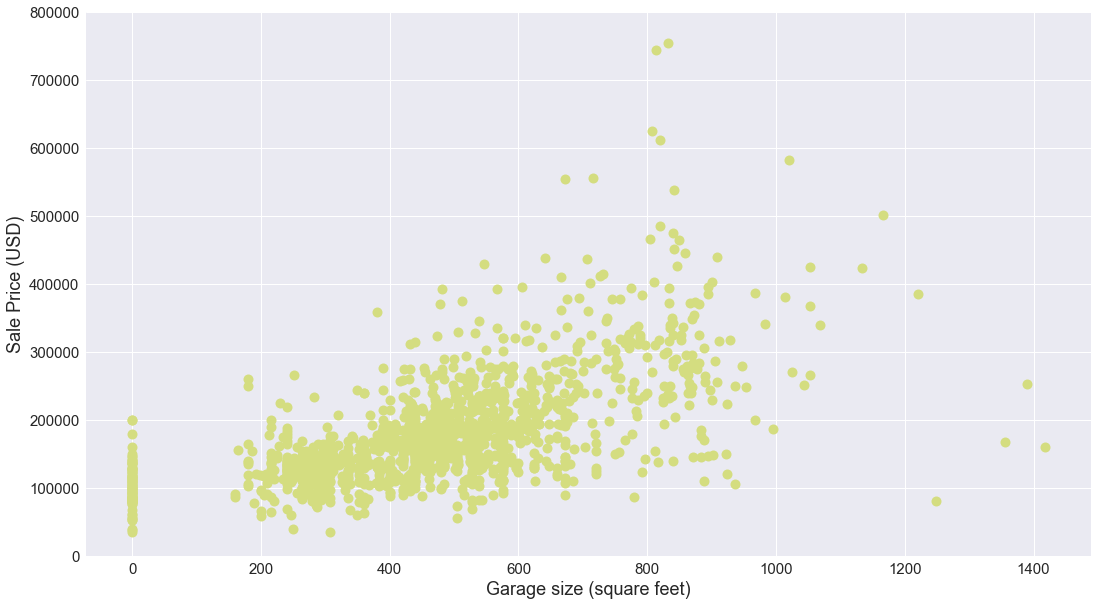

<Container object of 4 artists>

(0, 800000)

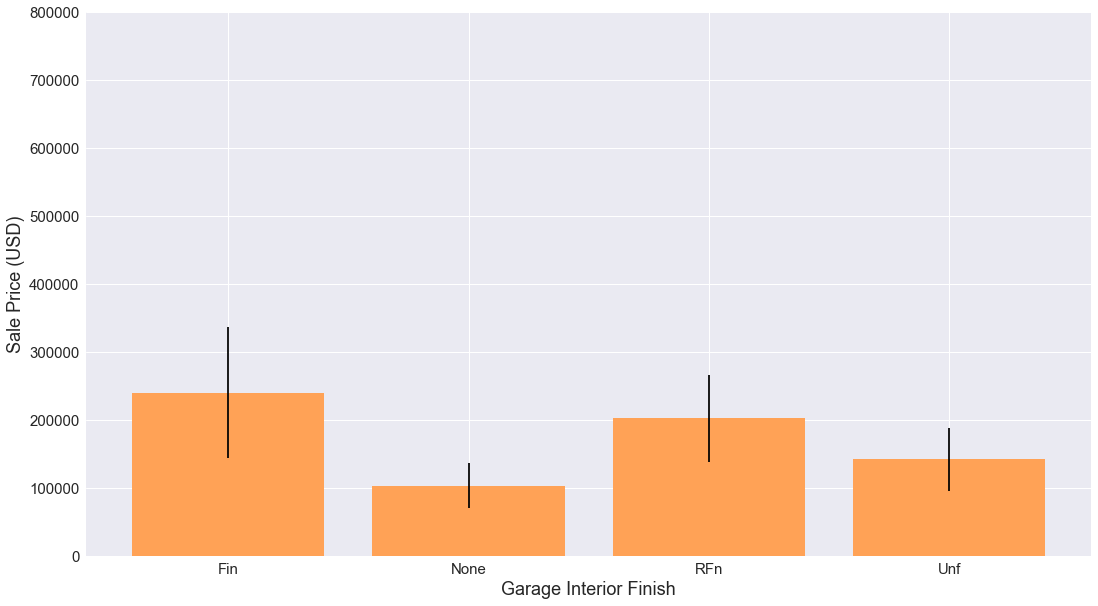

(0, 800000)

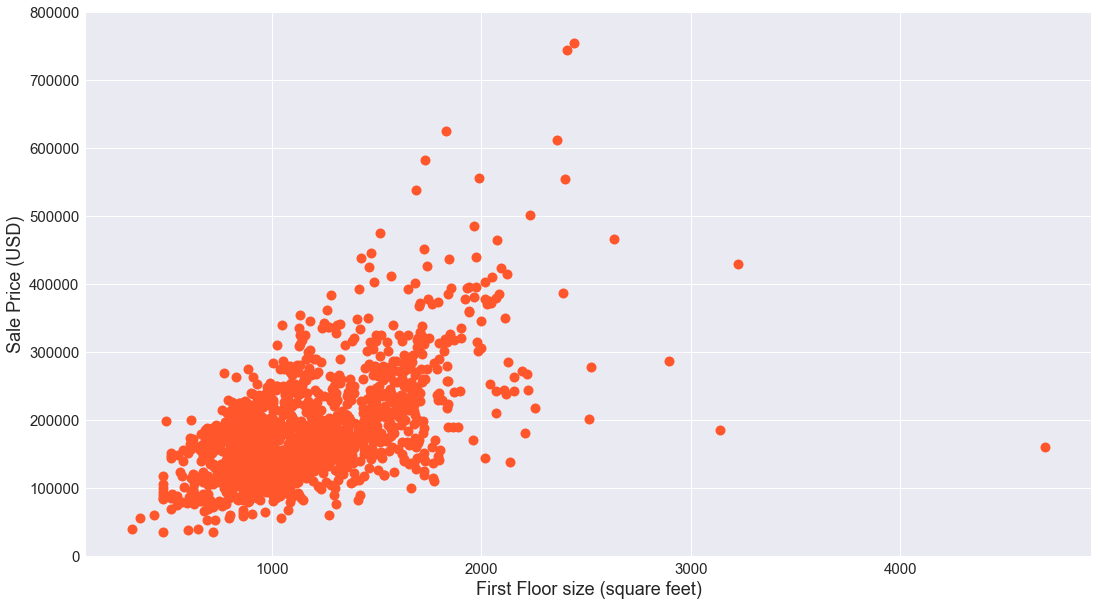

(0, 800000)

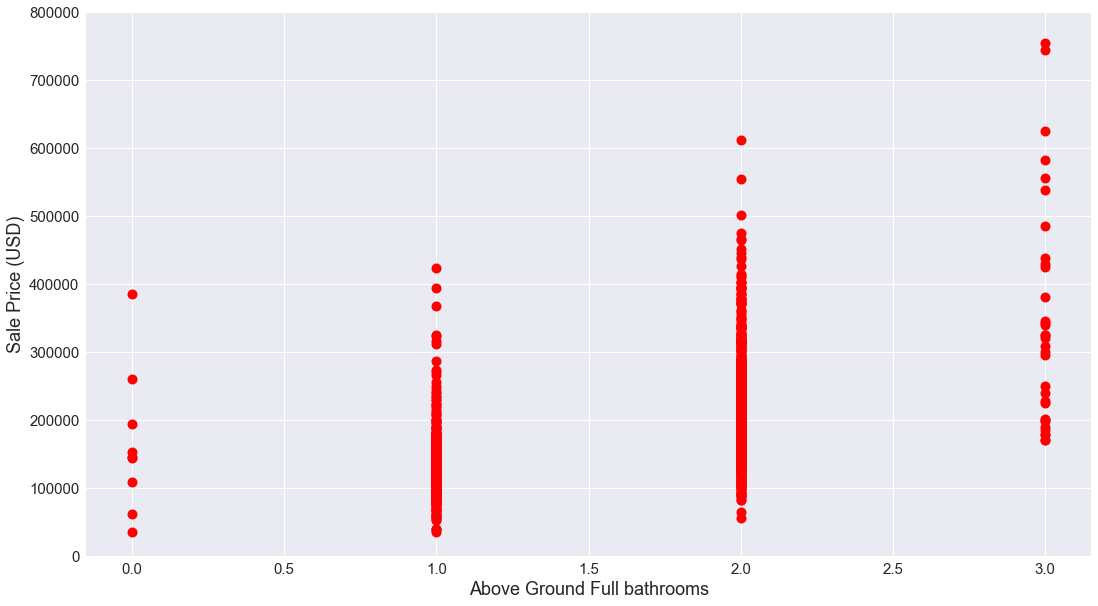

In [31]:
# Plot relationship of each of the 10 variables with SalePrice.
# Note: use values before log transformation (from data_raw dataframe)

plot_num = 10 # Number of plots.

colors=cm.rainbow(np.linspace(0,1,plot_num)) # Set a unique color for each plot.

y = data_raw['SalePrice'] # Set Sale price as the predicted variable.

ylims = [0,800000] # Set y limits.

x_labels = [
    
            'Overall Quality',
            'Neighborhood',
            'Above Ground Living Area (square feet)',
            'Garage Car Capacity',
            'Exterior Quality',
            'Kitchen Quality',
            'Garage size (square feet)',
            'Garage Interior Finish',
            'First Floor size (square feet)',
            'Above Ground Full bathrooms',
         ]

# Plot.
for i,var in enumerate(all_corrs_sorted[0:plot_num].keys()):
    
    # Bar plots for categorical predictors.
    if isinstance(data_raw[var].loc[0], str):
        
        fig, axis = plt.subplots(figsize=(18, 10))
        
        grouped = data_raw[[var,'SalePrice']].groupby(var, axis=0)
        X = grouped.mean()

        stds = list()
        for g,v in grouped:
            stds.append(np.std(v['SalePrice']))
            
        axis.bar(range(len(X.index)), X.values, align='center', color=colors[i],yerr=stds)

        axis.set_xticks(np.arange(len(X.index)))
        if len(X.index) < 10:
            axis.set_xticklabels(X.index)
        else:
            Xticks = list()
            for j,label in enumerate(X.index):
                Xticks.append(label[0:3])
            axis.set_xticklabels(Xticks)
            del Xticks

        axis.set_ylabel('Sale Price (USD)',fontsize=18)
        axis.set_xlabel(x_labels[i],fontsize=18)
        axis.set_ylim(ylims)
        
        plt.show();
        fig.savefig(var + ' relation with SalePrice', bbox_inches='tight', transparent=False); # Save figure.
        
        del stds
        
    # Scatterplots for numerical variables.
    else:
        
        fig, axis = plt.subplots(figsize=(18, 10))

        axis.grid(True)
        axis.set_xlabel(x_labels[i],fontsize=18);
        axis.set_ylabel('Sale Price (USD)',fontsize=18)

        axis.plot(data_raw[var], y, marker='o', linestyle='', ms=10, color=colors[i]);
        axis.set_ylim(ylims)
        
        plt.show();
        fig.savefig(var + ' relation with SalePrice', bbox_inches='tight', transparent=False); # Save figure.

In [32]:
# examine neighborhood mean sale prices.

grouped = data_raw[['Neighborhood','SalePrice']].groupby('Neighborhood', axis=0)
X = grouped.mean()

X.sort_values(by='SalePrice',ascending=False)

,SalePrice
Neighborhood,
NoRidge,335295.3171
NridgHt,316270.6234
StoneBr,310499.0000
Timber,242247.4474
Veenker,238772.7273
Somerst,225379.8372
ClearCr,212565.4286
Crawfor,210624.7255
CollgCr,197965.7733


In [33]:
# Remove outliers based on these realtions.
# Note: use log values for variables which have been log transformed before.

# Create index of outliers.
ind = (data['SalePrice'] > np.log1p(700000)) | \
    (data['GrLivArea']> np.log1p(4000)) | \
    (data['GarageArea'] > 1200) | \
    (data['1stFlrSF'] > np.log1p(4000))

# Remove outliers.
data.drop(data[ind.values].index,axis = 0, inplace = True)

print('%i outliers were removed. %i cases remain.' %(sum(ind), data.shape[0]))

8 outliers were removed. 1452 cases remain.


(0, 700000)

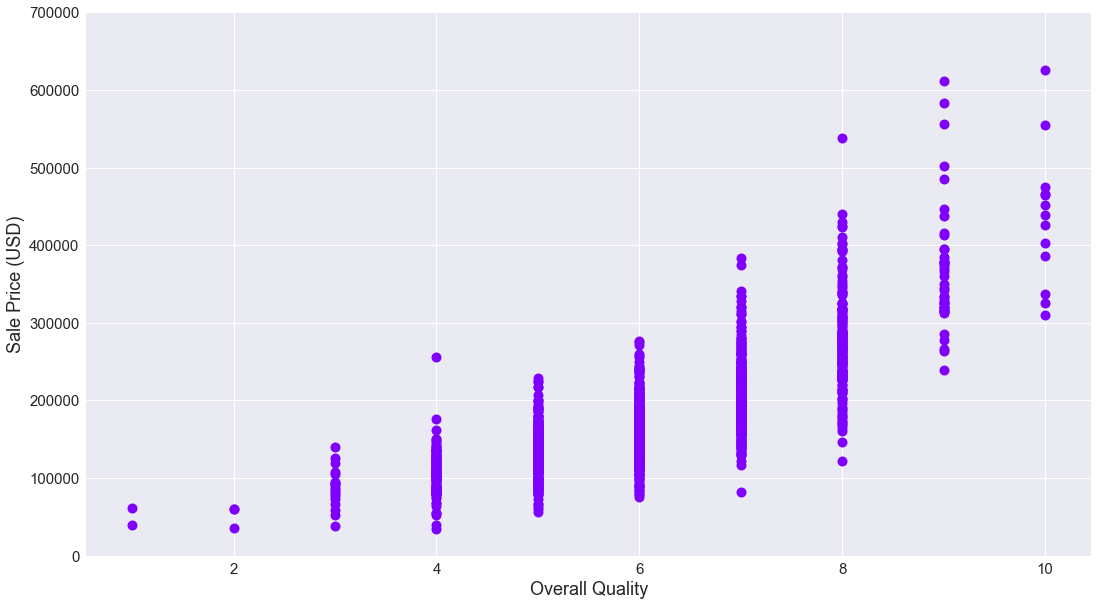

<Container object of 25 artists>

(0, 700000)

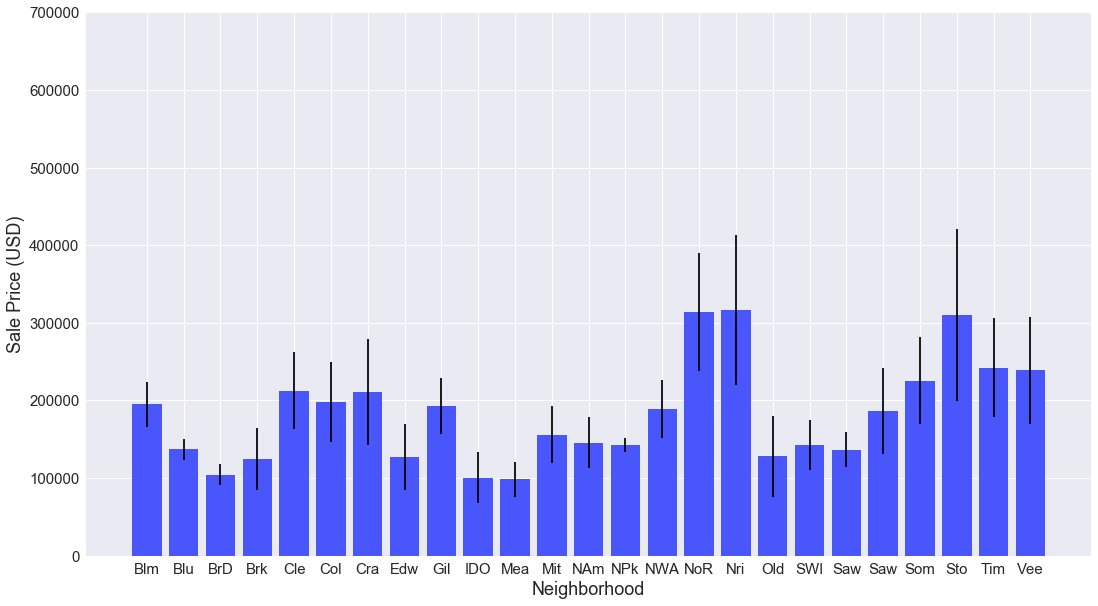

(0, 700000)

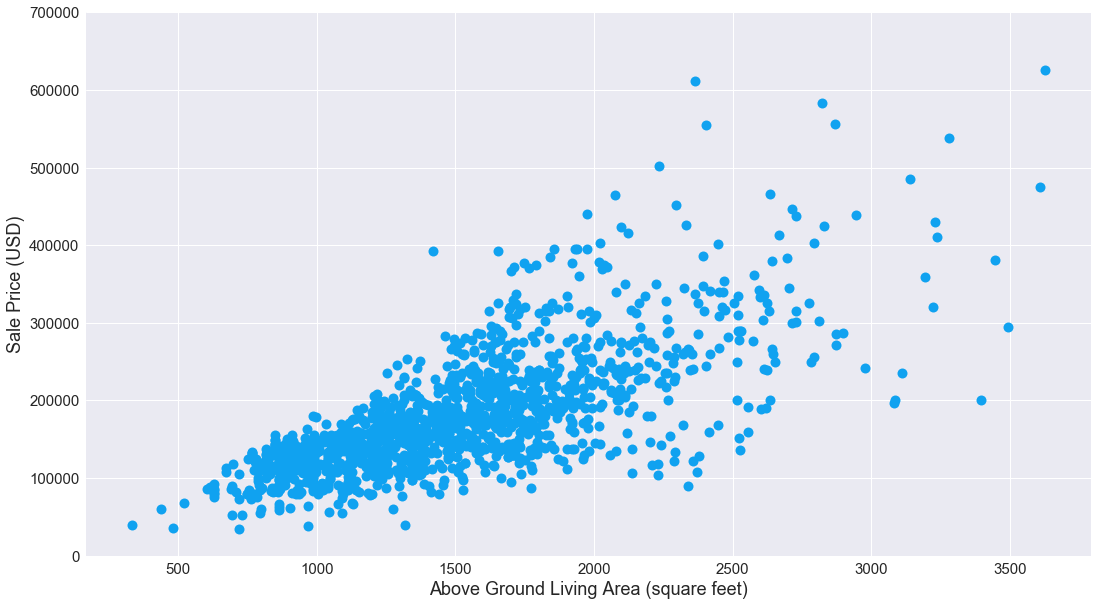

(0, 700000)

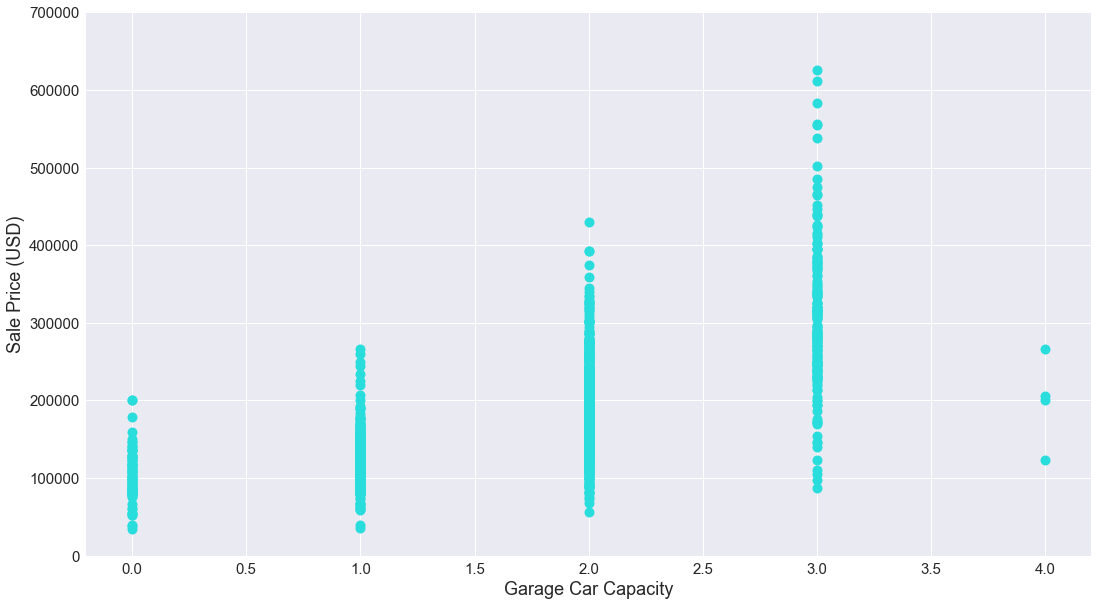

(0, 700000)

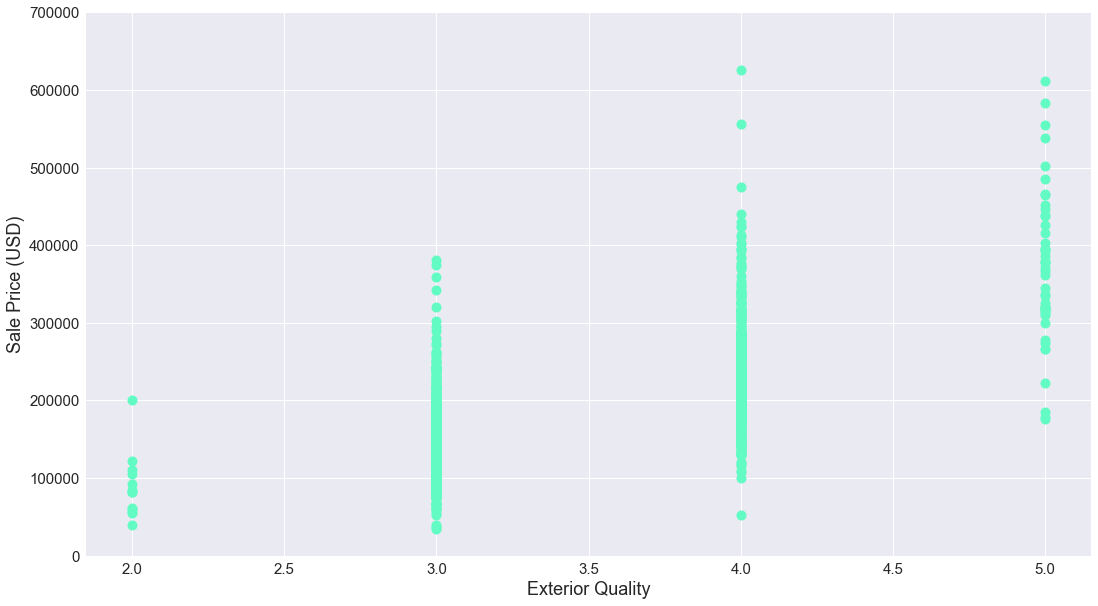

(0, 700000)

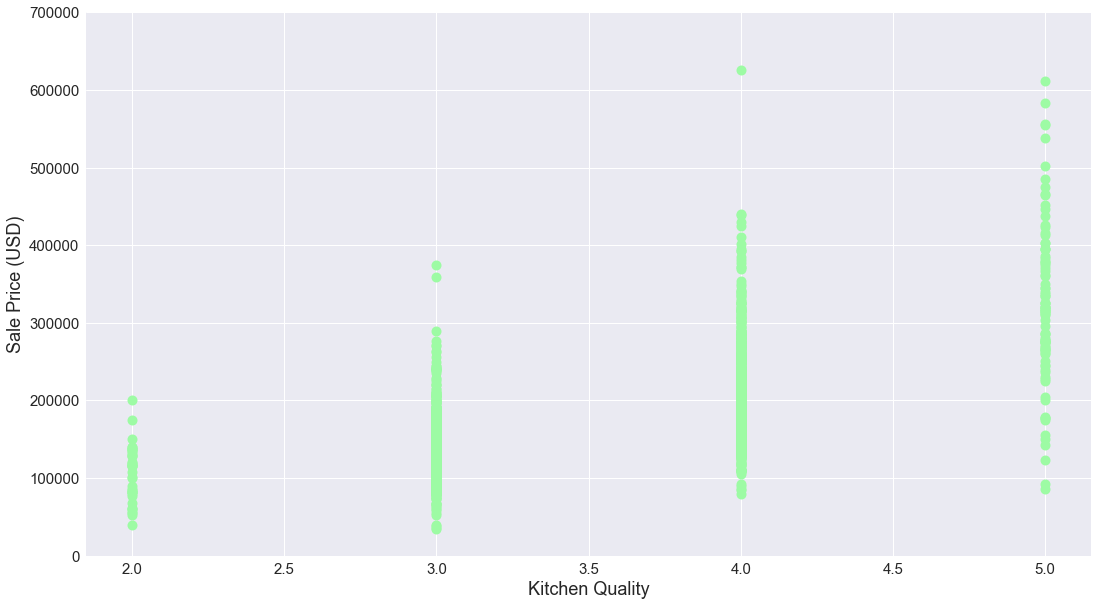

(0, 700000)

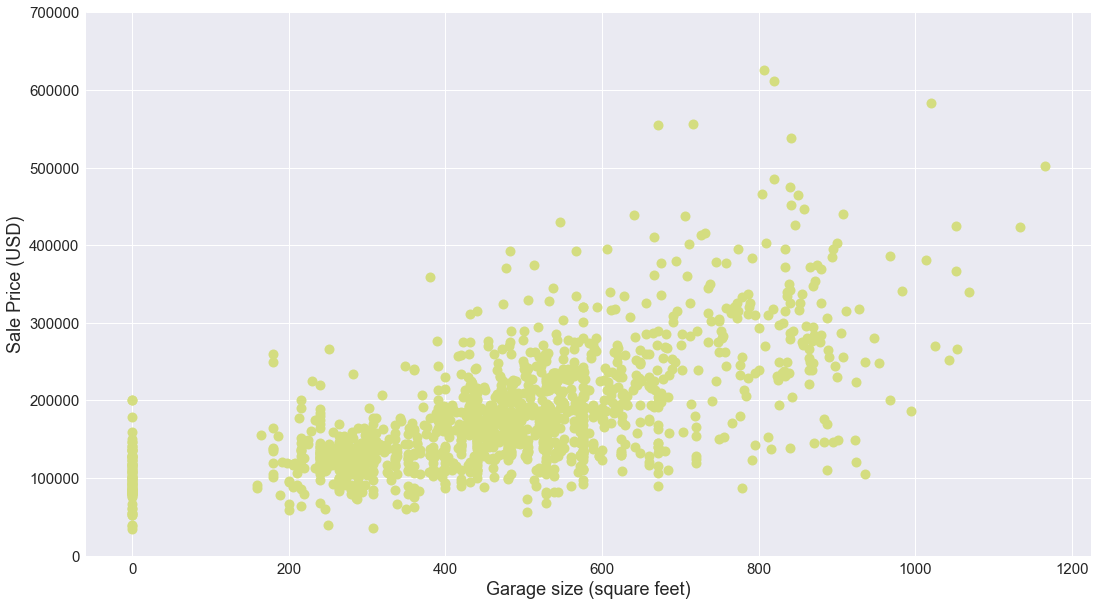

<Container object of 4 artists>

(0, 700000)

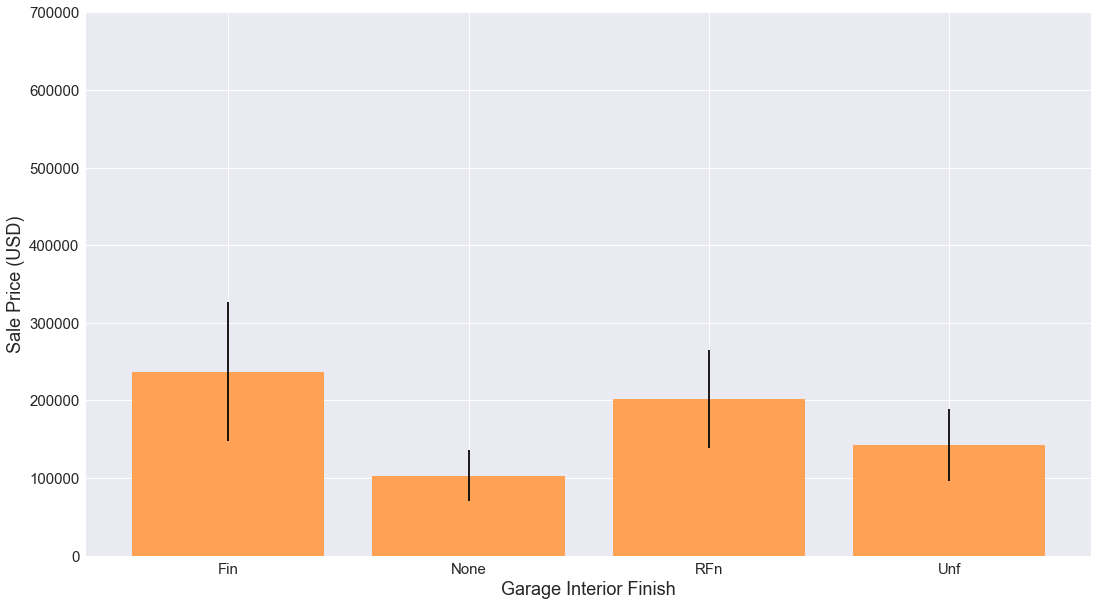

(0, 700000)

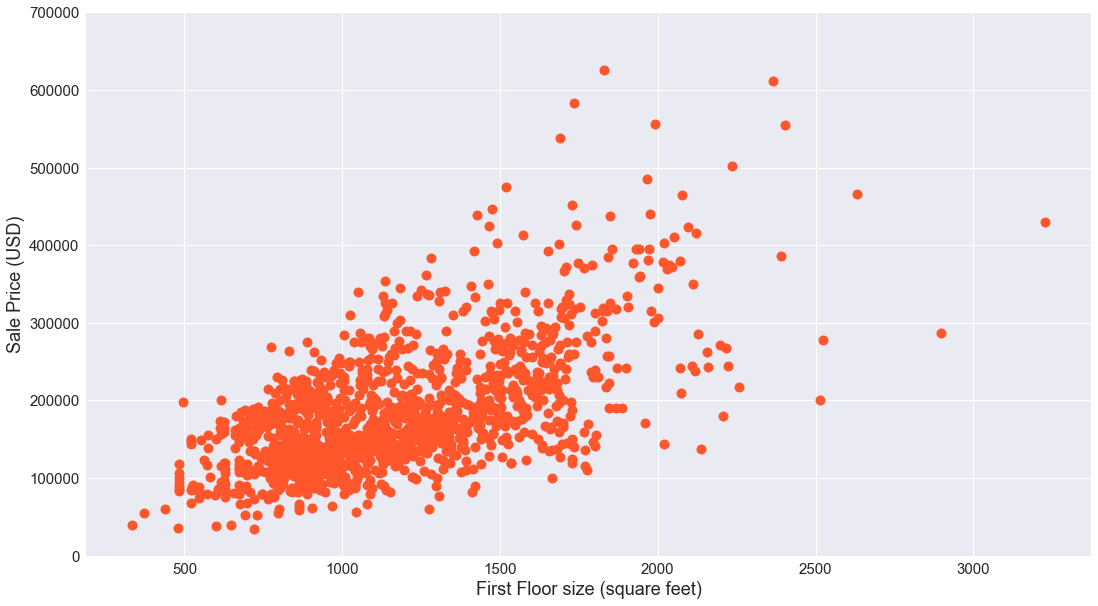

(0, 700000)

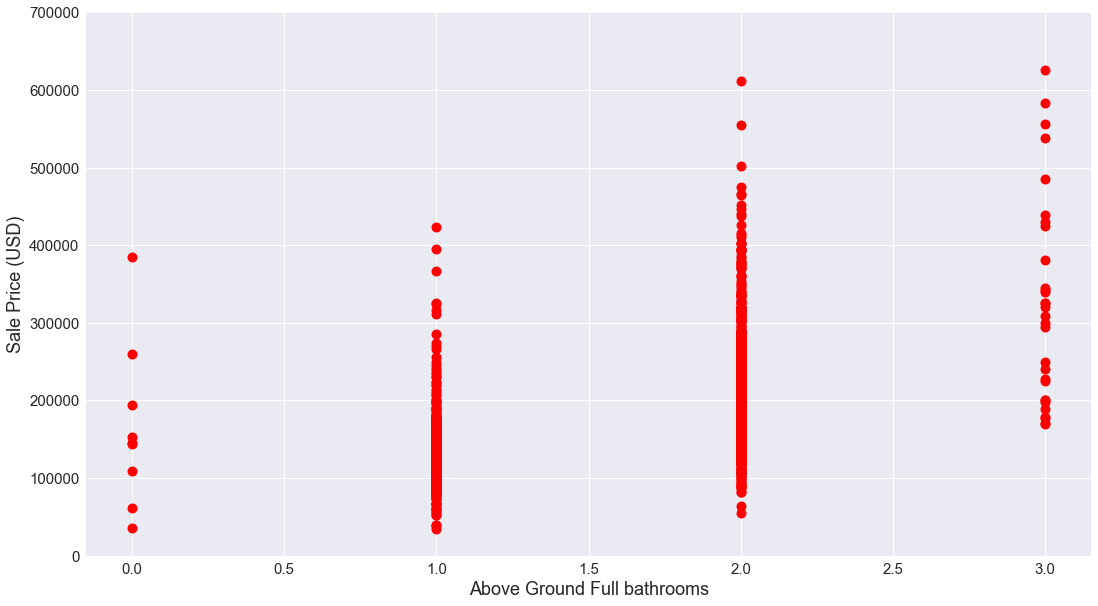

In [34]:
# Plot again scatter plots after removal of outliers.

# Remove outliers from the raw data (to present values without log transformation).
ind = (data_raw['SalePrice'] > 700000) | \
    (data_raw['GrLivArea']> 4000) | \
    (data_raw['GarageArea'] > 1200) | \
    (data_raw['1stFlrSF'] > 4000)
data_raw.drop(data_raw[ind.values].index,axis = 0, inplace = True)

y = data_raw['SalePrice'] # Set Sale price as the predicted variable.

ylims = [0,700000] # Set y limits.

for i,var in enumerate(all_corrs_sorted[0:plot_num].keys()):
    
    # Bar plots for categorical predictors.
    if isinstance(data_raw[var].loc[0], str):
        
        fig, axis = plt.subplots(figsize=(18, 10))
        
        grouped = data_raw[[var,'SalePrice']].groupby(var, axis=0)
        X = grouped.mean()

        stds = list()
        for g,v in grouped:
            stds.append(np.std(v['SalePrice']))
            
        axis.bar(range(len(X.index)), X.values, align='center', color=colors[i],yerr=stds)

        axis.set_xticks(np.arange(len(X.index)))
        if len(X.index) < 10:
            axis.set_xticklabels(X.index)
        else:
            Xticks = list()
            for j,label in enumerate(X.index):
                Xticks.append(label[0:3])
            axis.set_xticklabels(Xticks)
            del Xticks

        axis.set_ylabel('Sale Price (USD)',fontsize=18)
        axis.set_xlabel(x_labels[i],fontsize=18)
        axis.set_ylim(ylims)
        
        plt.show();
        fig.savefig(var + ' relation with SalePrice - outliers removed', bbox_inches='tight', transparent=False); # Save figure.
        
        del stds
        
    # Scatterplots for numerical variables.
    else:
        
        fig, axis = plt.subplots(figsize=(18, 10))

        axis.grid(True)
        axis.set_xlabel(x_labels[i],fontsize=18);
        axis.set_ylabel('Sale Price (USD)',fontsize=18)

        axis.plot(data_raw[var], y, marker='o', linestyle='', ms=10, color=colors[i]);
        axis.set_ylim(ylims)
        
        plt.show();
        fig.savefig(var + ' relation with SalePrice - outliers removed', bbox_inches='tight', transparent=False); # Save figure.

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Modeling
</p>

In [35]:
# Create a dataframe of all variables to be included in modeling (i.e., with strongest correlations with Sale Price).

# Set number of predicting variables
pred_n = 10 

# Get names of the top predicting varibles
model_vars = all_corrs_sorted[0:pred_n].keys().tolist()

# Set predictors and predicted variables in seperate dataframes.
y = data['SalePrice']
X = data[model_vars]

In [36]:
# Create dummy variables for categorical variables.
X_dummy = pd.get_dummies(X)
print('number of variables before creation of dummy variables: %i' %(X.shape[1]))
print('number of variables after creation of dummy variables: %i' %(X_dummy.shape[1]))
print('%i dummy variables were created' %(X_dummy.shape[1] - X.shape[1]))

number of variables before creation of dummy variables: 10
number of variables after creation of dummy variables: 37
27 dummy variables were created


In [37]:
# Examine data with dummy variables.
X_dummy.head(5)

# Data look ok.

,OverallQual,GrLivArea,GarageCars,ExterQual,KitchenQual,GarageArea,1stFlrSF,FullBath,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
0,7,7.4448,2,4,4,548,6.7534,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,6,7.1412,2,3,3,460,7.1412,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,7,7.4883,2,4,4,608,6.8255,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,7,7.4489,3,3,4,642,6.8690,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,8,7.6958,3,4,4,836,7.0440,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [38]:
# Split the data to traininig (30%) and test (70%) subsets. 
 
X_train,X_test,y_train,y_test = train_test_split(X_dummy,y,test_size = 0.3,random_state= 0)

print('Training set contains %i cases' %(X_train.shape[0]))
print('Test set contains %i cases' %(X_test.shape[0]))

Training set contains 1016 cases
Test set contains 436 cases


In [39]:
# Split quantative and qualitative predicting variables.
quantitative = [var for var in X_train.columns if X_train.dtypes[var] != 'object']
qualitative = [var for var in X_train.columns if X_train.dtypes[var] == 'object']

In [40]:
# Standardize quantitative features, seperately for training and test sets.
X_train_sc = X_train.copy()
X_test_sc = X_test.copy()
y_train_sc = y_train.copy()
y_test_sc = y_test.copy()

stdSc = StandardScaler()
X_train_sc.loc[:, quantitative] = stdSc.fit_transform(X_train.loc[:,quantitative])
X_test_sc.loc[:, quantitative] = stdSc.fit_transform(X_test.loc[:, quantitative])

y_train_sc.loc[:] = stdSc.fit_transform(y_train.loc[:])
y_test_sc.loc[:] = stdSc.fit_transform(y_test.loc[:])

y_train_sc.values.reshape(-1, 1);
y_test_sc.values.reshape(-1, 1);

C:\Users\AA\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\AA\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\AA\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X

In [41]:
def model_fit(model,standard):
    
    # Fit model 
    if standard == False:  # Use standarteized values.
        model.fit(X_train, y_train)
        
        # Predict test y values.
        y_prediction = model.predict(X_test)

        # Calculate root-mean-square error (RMSE), indicative of diffrences between predicted and obseverd values.
        RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

        # Calcualte R square, indicative of the percentage of variance of the predicted varialbe explained by the model.
        #R2 = pearsonr(y_test,y_prediction)[0]**2
        R2 = r2_score(y_test,y_prediction)
        
    else:                  # Use non-standarteized values.
        model.fit(X_train_sc, y_train_sc)
        
        # Predict test y values.
        y_prediction = model.predict(X_test_sc)

        # Calculate root-mean-square error (RMSE), indicative of diffrences between predicted and obseverd values.
        RMSE = sqrt(mean_squared_error(y_true = y_test_sc, y_pred = y_prediction))

        # Calcualte R square, indicative of the percentage of variance of the predicted varialbe explained by the model.
        #R2 = pearsonr(y_test_sc,y_prediction)[0]**2
        R2 = r2_score(y_test_sc,y_prediction)
     
    
    return(RMSE,R2)

In [73]:
models = list()

models = [
    ('Linear regression',LinearRegression()),
    ('Bayesian Ridge regression', BayesianRidge()),
    ('Decision tree',DecisionTreeRegressor(max_depth=1500,random_state=0)),
    ('Random forest',RandomForestRegressor(max_depth=1500,random_state=0)),
    ('Gradient boosting',GradientBoostingRegressor(random_state=0))
    #     ('Linear regression without regulation',LinearRegression()),
    #     ('Linear regression with Ridge regularization', Ridge()),
    #     ('Linear regression with Lasso regularization (L1 penalty)',Lasso(random_state=0)),
    #     ('Linear regression with ElasticNet regularization',ElasticNet(random_state=0)), 
     ]

In [75]:
# Train models and get test results.

standard = False
results = pd.DataFrame(columns = ['Model','RMSE','R-squared'])


for i,model in enumerate(models):
    RMSE,R2 = model_fit(model[1],standard)
    results.loc[i] = [model[0],RMSE,R2]

In [76]:
# Present test results.
results.sort_values(by='R-squared', ascending=False)

,Model,RMSE,R-squared
1,Bayesian Ridge regression,0.1144,0.9134
0,Linear regression,0.1145,0.9132
4,Gradient boosting,0.1162,0.9105
3,Random forest,0.1347,0.8798
2,Decision tree,0.2000,0.7350


In [48]:
# Get varaible importance (Gini importance) from a random forest model including all variables in dataset.

# Prepare data.
data_dummy = pd.get_dummies(data)
data_dummy.drop('SalePrice',axis=1,inplace=True)

# Fit model.
allX_train,allX_test,ally_train,ally_test = train_test_split(data_dummy,y,test_size = 0.3,random_state= 0)
model = RandomForestRegressor(max_depth=1500,random_state=0)
model.fit(allX_train, ally_train)

# Get vaiable importance.
feats = {} 
for feature, importance in zip(data_dummy.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1500,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

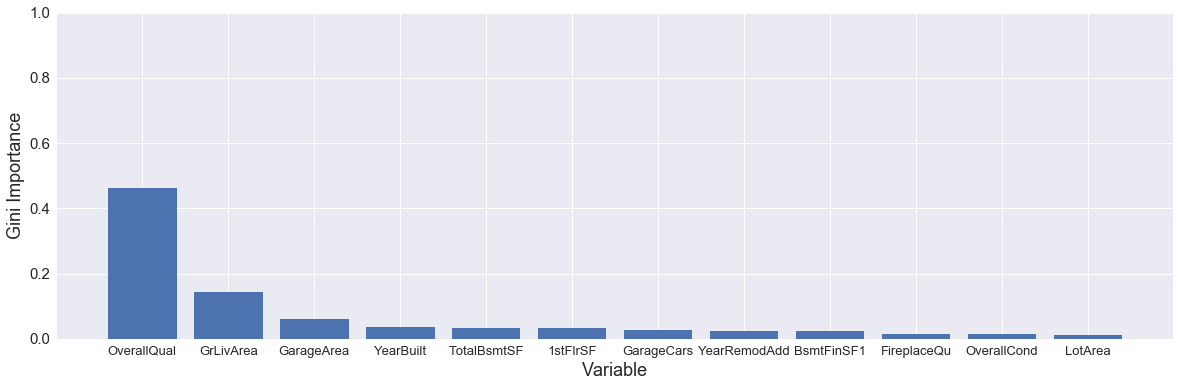

In [80]:
# Plot variable importance.
max_import = importances['Gini-importance']>0.01
X = importances[max_import].sort_values(by='Gini-importance',ascending=False)
    
fig, axis = plt.subplots(figsize=(20, 6)) 
axis.bar(range(len(X.index)), X.values, align='center')

axis.set_xticks(np.arange(len(X.index)))
axis.set_xticklabels(X.index,fontsize=13)

axis.set_ylabel('Gini Importance',fontsize=18)
axis.set_xlabel('Variable',fontsize=18)
axis.set_ylim([0,1])

plt.show();

fig.savefig('Gini Importane', bbox_inches='tight', transparent=False); # Save figure.

In [50]:
# Get names of the top predicting varibles.
max_import_vars = max_import[max_import == True].keys()

# Set predictors and predicted variables in seperate dataframes.
y = data['SalePrice']
X = data[max_import_vars]

# Split the data to traininig (30%) and test (70%) subsets.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 0)

print('Training set contains %i cases' %(X_train.shape[0]))
print('Test set contains %i cases' %(X_test.shape[0]))

Training set contains 1016 cases
Test set contains 436 cases


In [66]:
# Train models and get test results.
standard = False
results = pd.DataFrame(columns = ['Model','RMSE','R-squared'])


for i,model in enumerate(models):
    RMSE,R2 = model_fit(model[1],standard)
    results.loc[i] = [model[0],RMSE,R2]

In [77]:
# Present test results.
results.sort_values(by='R-squared', ascending=False)

# We can see and improvement in test accuracy.

,Model,RMSE,R-squared
1,Bayesian Ridge regression,0.1144,0.9134
0,Linear regression,0.1145,0.9132
4,Gradient boosting,0.1162,0.9105
3,Random forest,0.1347,0.8798
2,Decision tree,0.2000,0.7350
